# 🧭 Stage 9 Practice — Backtesting Foundations

---

### 🎯 Objective  
Before building the full **Stage 9 Backtesting Project**, this notebook focuses on mastering the **core quantitative concepts** that make backtesting realistic and reliable.

You will practice:  
1. ⏳ **Time-based splitting** — separating in-sample (train) and out-of-sample (test) data  
2. 🔁 **Rolling & Expanding Windows** — measuring risk and return dynamically through time  
3. 📈 **Performance Metrics** — CAGR, Volatility, Sharpe, Sortino, Max Drawdown  
4. ⚖️ **Benchmark Comparison** — testing optimized portfolios against equal-weight or index portfolios  
5. 🎨 **Rolling Visualization** — plotting cumulative returns, drawdowns, and rolling Sharpe ratios  

---

### 📚 Why This Matters  
In **Stage 8**, you optimized portfolios using historical data.  
But optimization alone can **overfit** the past.  

**Backtesting (Stage 9)** tests if those portfolios remain strong when markets move forward — revealing **robustness, consistency, and risk exposure**.  
This notebook bridges theory → practice: turning optimization results into performance analysis.

---

### 🧩 Notebook Sections  

| Section | Concept | Focus |
|:--:|:--|:--|
| **1️⃣** | Setup & Data Import | Install libraries + fetch market data |
| **2️⃣** | Time Splitting | Create in-sample / out-of-sample periods |
| **3️⃣** | Rolling Windows | Explore moving averages & volatility |
| **4️⃣** | Performance Metrics | Compute CAGR, Drawdown, Sharpe, Sortino |
| **5️⃣** | Comparative Visualization | Plot and analyze portfolio performance |

---

### 🧠 Learning Outcome  
By the end of this practice notebook, you will be able to:  
- Handle time-series financial data correctly  
- Compute risk-return metrics with NumPy and Pandas  
- Use rolling windows for dynamic analysis  
- Compare multiple portfolio strategies  
- Build the foundation for your Stage 9 Main Backtesting Project  

---

### ▶️ Next Step  
Run the **setup cell** below to install libraries and fetch market data before starting the exercises.


In [18]:
# ⚙️ Stage 9 Practice — Setup & Data Import


!pip install yfinance pandas numpy matplotlib scipy --quiet


print(" All libraries installed successfully!\n")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

plt.style.use('seaborn-v0_8-darkgrid')


tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'XOM', 'TSLA']


start = '2015-01-01'
end = '2025-01-01'


data = yf.download(tickers, start=start, end=end)['Close']

returns = data.pct_change().dropna()


print(f" Data fetched successfully for tickers: {tickers}")
print(f"Data shape: {data.shape}")
print(f"Date Range: {data.index.min().strftime('%Y-%m-%d')} → {data.index.max().strftime('%Y-%m-%d')}\n")


data.tail()


/tmp/ipython-input-2068062116.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)['Close']
[********************* 43%                       ]  3 of 7 completed

 All libraries installed successfully!



[*********************100%***********************]  7 of 7 completed

 Data fetched successfully for tickers: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'XOM', 'TSLA']
Data shape: (2516, 7)
Date Range: 2015-01-02 → 2024-12-31



Ticker,AAPL,AMZN,GOOGL,JPM,MSFT,TSLA,XOM
Date,,,,,,,
2024-12-24,257.286652,229.050003,195.472733,237.286880,436.929108,462.279999,103.530914
2024-12-26,258.103729,227.050003,194.964386,238.099670,435.715790,454.130005,103.618484
2024-12-27,254.685883,223.750000,192.133591,236.170502,428.177216,431.660004,103.608757
2024-12-30,251.307877,221.300003,190.618546,234.358871,422.508362,417.410004,102.908180
2024-12-31,249.534180,219.389999,188.684860,234.740799,419.196533,403.839996,104.669365


## Step 2 — Train-Test Split (In-sample vs Out-of-sample)

To backtest realistically, we need to separate the dataset into:
- **Training (In-sample):** the period we use to optimize or estimate portfolio weights  
- **Testing (Out-of-sample):** future data where we apply those weights to see if the model still performs well  

This split mimics how quant models face real markets — trained on the past, tested on the unseen.


In [19]:
# Fixed train-test split for returns

train_returns = returns.loc['2015-01-01':'2020-12-31']
test_returns = returns.loc['2021-01-01':'2025-01-01']

print(f"Train period: {train_returns.index.min().strftime('%Y-%m-%d')} → {train_returns.index.max().strftime('%Y-%m-%d')}")
print(f"Test period:  {test_returns.index.min().strftime('%Y-%m-%d')} → {test_returns.index.max().strftime('%Y-%m-%d')}")
print(f"\nTrain shape: {train_returns.shape} | Test shape: {test_returns.shape}")

train_returns.head()


Train period: 2015-01-05 → 2020-12-31
Test period:  2021-01-04 → 2024-12-31

Train shape: (1510, 7) | Test shape: (1005, 7)


Ticker,AAPL,AMZN,GOOGL,JPM,MSFT,TSLA,XOM
Date,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.019054,-0.031045,-0.009196,-0.042041,-0.027362
2015-01-06,0.000094,-0.022833,-0.024680,-0.025929,-0.014677,0.005664,-0.005316
2015-01-07,0.014022,0.010600,-0.002941,0.001526,0.012706,-0.001562,0.010132
2015-01-08,0.038422,0.006836,0.003484,0.022347,0.029418,-0.001564,0.016645
2015-01-09,0.001072,-0.011749,-0.012211,-0.017387,-0.008405,-0.018802,-0.001410


## 🔁 Step 3 — Rolling Windows Practice

Static metrics (like average return or volatility) tell us *how a portfolio performed overall*,  
but **rolling windows** show *how performance changes through time.*

A rolling window computes statistics (mean, std, Sharpe, etc.) over a fixed lookback period —  
for example, the last 252 trading days (~1 year).  
It’s how quants track evolving risk and performance stability.

In this section, you’ll:
- Compute 1-year rolling mean returns  
- Compute 1-year rolling volatility  
- Compute a rolling Sharpe ratio  
- Visualize how they evolve for one stock


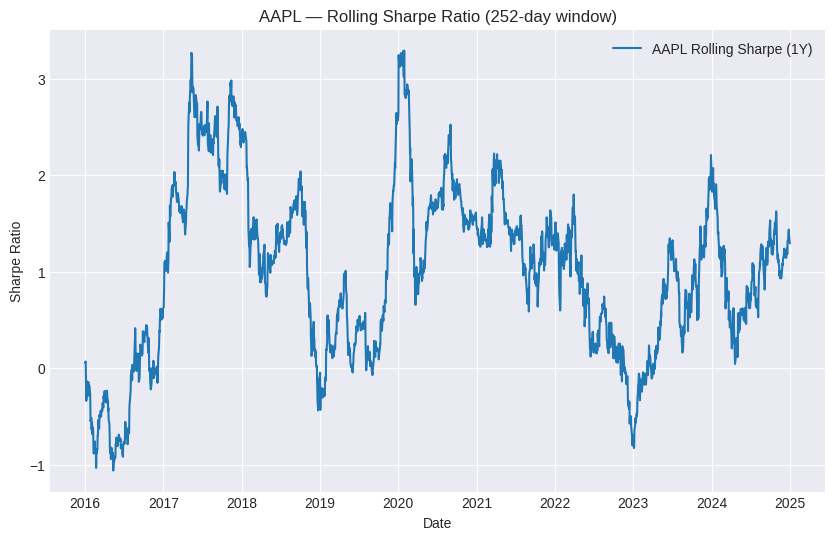

In [20]:
# Choose one stock for practice
ticker = 'AAPL'
daily_returns = returns[ticker]

# Define rolling window (252 trading days ~ 1 year)
window = 252

# Rolling metrics
rolling_mean = daily_returns.rolling(window).mean() * 252
rolling_vol = daily_returns.rolling(window).std() * np.sqrt(252)
rolling_sharpe = (rolling_mean / rolling_vol)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe, label=f"{ticker} Rolling Sharpe (1Y)")
plt.title(f"{ticker} — Rolling Sharpe Ratio (252-day window)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()


## 📊 Step 4 — Performance Metrics Practice

To evaluate a portfolio or a single asset, we need summary statistics that describe  
**return**, **risk**, and **risk-adjusted performance** over time.

In this section, you’ll compute five key metrics used in nearly every quant report:

| Metric | Meaning |
|:--|:--|
| **CAGR** | Compound Annual Growth Rate — average yearly return accounting for compounding |
| **Volatility** | Annualized standard deviation of returns — total risk |
| **Sharpe Ratio** | Return per unit of total risk |
| **Sortino Ratio** | Return per unit of downside risk (ignores upside volatility) |
| **Max Drawdown** | Largest percentage drop from peak value — worst loss period |

These form the foundation for portfolio evaluation and comparison.


In [21]:

ticker = 'AAPL'
r = returns[ticker]

# CAGR
cumulative = (1 + r).cumprod()
years = (r.index[-1] - r.index[0]).days / 365
cagr = cumulative.iloc[-1] ** (1 / years) - 1


# Annualized volatility
vol = r.std() * np.sqrt(252)

# Sharpe ratio
rf = 0.02
sharpe = (cagr - rf) / vol

# Sortino ratio (uses only negative returns for downside risk)
downside = r[r < 0].std() * np.sqrt(252)
sortino = (cagr - rf) / downside

# Max drawdown
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Display metrics
metrics = pd.Series({
    'CAGR': cagr,
    'Volatility': vol,
    'Sharpe': sharpe,
    'Sortino': sortino,
    'Max Drawdown': max_drawdown
})

print(f" Performance Metrics for {ticker}")
display(metrics.to_frame('Value'))


 Performance Metrics for AAPL


,Value
CAGR,0.262634
Volatility,0.284617
Sharpe,0.852492
Sortino,1.177982
Max Drawdown,-0.385159


### 🧩 Note on `.iloc[-1]` (FutureWarning Fix)

When working with Pandas Series indexed by **dates**, using `[-1]` can be ambiguous —  
it might refer to a *label* named `-1` (which doesn’t exist) or to the *last position*.  

To avoid confusion, always use **`.iloc[-1]`** when you mean *the last element by position*.

✅ Example:
```python
cagr = cumulative.iloc[-1] ** (1 / years) - 1


### 📉 Sortino Ratio — Focus on Downside Risk

The **Sortino ratio** measures return per unit of *downside* risk.  
Unlike the Sharpe ratio, it ignores positive volatility and only penalizes returns that fall **below a target** (usually 0% or the risk-free rate).

\[
S_{sortino} = \frac{R_p - R_f}{\sigma_d}
\]

where  
- \( R_p \): portfolio’s mean return  
- \( R_f \): risk-free rate  
- \( \sigma_d \): standard deviation of **negative returns** (below target)

🔹 Intuition: *Not all volatility is bad — only the kind that loses money.*  
A higher Sortino means more return with less downside pain.


## 📊 Step 5 — Comparative & Visualization Practice

Individual metrics tell you performance *in numbers*,  
but visualization helps you **see** how assets behave through time.

In this section, you will:
1. Compare multiple assets (AAPL, MSFT, GOOGL, etc.)
2. Compute key performance metrics for each  
3. Plot cumulative returns to see growth patterns  
4. Plot drawdowns to visualize risk and recovery  

This mirrors how quants evaluate portfolios — *numbers plus narrative*.


,CAGR,Volatility,Sharpe,Sortino,Max Drawdown
Ticker,,,,,
AAPL,0.262634,0.284617,0.852492,1.177982,-0.385159
MSFT,0.265215,0.271390,0.903553,1.234217,-0.371485
GOOGL,0.217956,0.284701,0.695310,0.964635,-0.443201
AMZN,0.304246,0.327809,0.867109,1.254907,-0.561453


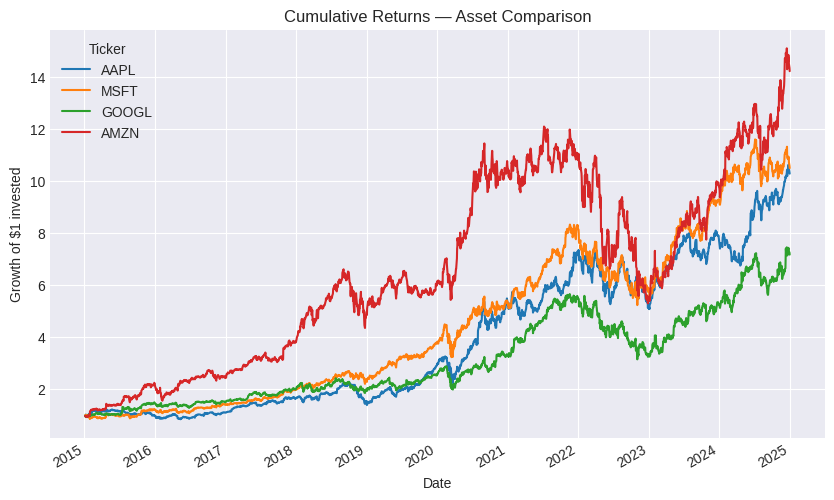

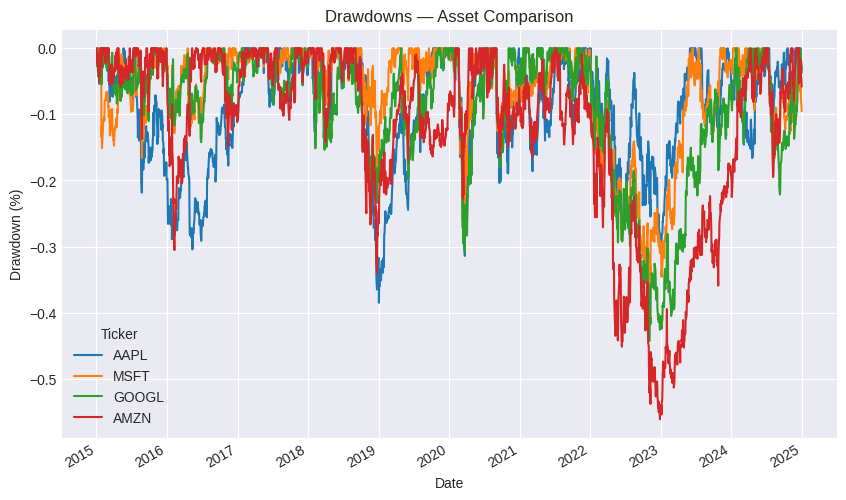

In [22]:
# Select a few tickers to compare
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
comparison = returns[assets]

# Compute cumulative returns for each
cumulative_returns = (1 + comparison).cumprod()

# Function to calculate metrics
def performance_stats(r):
    cumulative = (1 + r).cumprod()
    years = (r.index[-1] - r.index[0]).days / 365
    cagr = cumulative.iloc[-1] ** (1 / years) - 1
    vol = r.std() * np.sqrt(252)
    rf = 0.02
    sharpe = (cagr - rf) / vol
    downside = r[r < 0].std() * np.sqrt(252)
    sortino = (cagr - rf) / downside
    drawdown = (cumulative / cumulative.cummax()) - 1
    max_dd = drawdown.min()
    return pd.Series({
        'CAGR': cagr,
        'Volatility': vol,
        'Sharpe': sharpe,
        'Sortino': sortino,
        'Max Drawdown': max_dd
    })

# Calculate metrics for all assets
stats = comparison.apply(performance_stats, axis=0).T
display(stats)

# Plot cumulative returns comparison
plt.figure(figsize=(10,6))
(1 + comparison).cumprod().plot(ax=plt.gca())
plt.title("Cumulative Returns — Asset Comparison")
plt.ylabel("Growth of $1 invested")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()

# Plot drawdowns comparison
plt.figure(figsize=(10,6))
((1 + comparison).cumprod() / (1 + comparison).cumprod().cummax() - 1).plot(ax=plt.gca())
plt.title("Drawdowns — Asset Comparison")
plt.ylabel("Drawdown (%)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()


### 💡 Interpretation

- **Cumulative Returns Plot** shows overall growth trends — who performed best over time.  
- **Drawdown Plot** shows how deep and frequent losses were.  
  Assets with smaller, faster-recovering drawdowns are usually more stable.  

Together, these visuals make performance *intuitive* — you see which assets offered high return, smooth growth, or painful dips.


### 🧭 Quant Insight — The 2022–2023 Systemic Drawdown and Beta Risk

The 2022–2023 market-wide dip wasn’t about individual companies — it was driven by **systemic risk**:  
rising inflation, interest rate hikes, liquidity tightening, and global uncertainty.

In quant terms, this kind of broad movement is captured by **beta** —  
a measure of how sensitive an asset or portfolio is to the overall market.

\[
\beta_i = \frac{\text{Cov}(R_i, R_m)}{\text{Var}(R_m)}
\]

- A **high beta** (>1) stock (like TSLA or AMZN) tends to magnify market moves — rising more in bull runs, falling harder in bear phases.  
- A **low beta** (<1) stock (like PG or XOM) moves less with the market — offering stability but slower growth.  
- **Beta = 1** means the stock moves roughly in sync with the market index.

During 2022–2023, the **market factor dominated** — beta risk overwhelmed diversification benefits.  
All assets, regardless of sector, were pulled in the same direction by the macro environment.

🔹 **Key takeaway:**
- Diversification reduces *idiosyncratic* (stock-specific) risk.  
- But *systemic* or *beta risk* — exposure to the entire market — cannot be diversified away.  
- Managing portfolio beta is crucial for stability during broad market corrections.


## 🧾 Stage 9 Practice — Conclusion & Transition

This notebook was all about learning how to evaluate performance realistically —  
not just by how much something earns, but by how stable and consistent that growth actually is.

### 🧩 What I Practiced
| Concept | What I Learned |
|:--|:--|
| **Train-Test Split** | How to separate in-sample (training) and out-of-sample (testing) periods properly |
| **Rolling Windows** | How to measure changing returns, volatility, and Sharpe over time |
| **Performance Metrics** | CAGR, Volatility, Sharpe, Sortino, and Max Drawdown — the core tools for portfolio evaluation |
| **Visualization** | How to read cumulative return and drawdown charts to see both growth and pain |
| **Quant Insight** | Why 2022–2023 caused a systemic drawdown and how beta affects diversification |

### 🧠 Reflections
Rolling analysis showed me that performance isn’t static — it evolves.  
Sharpe and Sortino helped me see that return alone doesn’t mean much without risk context.  
The drawdown chart made it clear how every asset experiences pain differently.  
And understanding systemic risk and beta taught me that diversification has limits — market-wide shocks still move everything together.

### 🚀 Next Step
The next step is to start the **Stage 9 Main Backtesting Project** —  
I’ll take the optimized portfolios I built in Stage 8 (Markowitz, Max Sharpe, Min Variance)  
and test them *out-of-sample* on future data.  

The goal is to see how well those portfolios actually hold up in real, unseen conditions —  
to test robustness, not just optimization.

This marks the point where I move from learning tools to building real, research-style validation.
